# Visualizing Earnings Based on College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [45]:
# setting up the enviroment

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading the file into a dataframe

recent_grads = pd.read_csv('recent-grads.csv')

## 1. Data preparation

In [3]:
# first exploration on the dataset

print(recent_grads.iloc[0]) # return the first row formatted as a table

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
recent_grads.head() # return the first 5 rows of the dataframe

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail() # return the last 5 rows of the dataframe

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [7]:
recent_grads.describe() # return summary statistics for all the numeric columns

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
recent_grads.info() # checking the amount of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

We can see that the maximum amount of missing values in each column is 1. In this case we will remove all rows with missing values:

In [10]:
recent_grads = recent_grads.dropna() # remove rows with missing data

## 2. Exploring relations with scatter plots

First of all, we will check if there is a linear correlation between the sample size and the total of graduated people:

[]

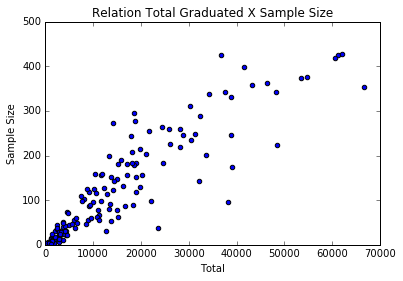

In [91]:
ax = recent_grads.plot(x = 'Total', y = 'Sample_size', kind = 'scatter')
ax.set_ylim(0, 500)
ax.set_xlim(0, 70000)
ax.set_title('Relation Total Graduated X Sample Size')
ax.set_xlabel('Total')
ax.set_ylabel('Sample Size')
ax.plot()

There is a slight relation. The bigger the total amount of people graduated, the bigger the sample size. In this case we can use both the sample size and the total amount of graduated people to check further correlations between the popularity of the majors and other values existing in the dataset.

[]

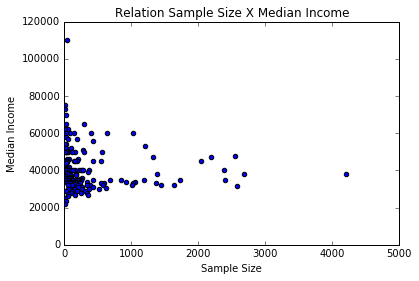

In [33]:
# sample size and median of incomes:

ax1 = recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')
ax1.set_xlim(0, 5000)
ax1.set_title('Relation Sample Size X Median Income')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Median Income')
ax1.plot()

We find no direct relation between the popularity of the major and the income that people make.

[]

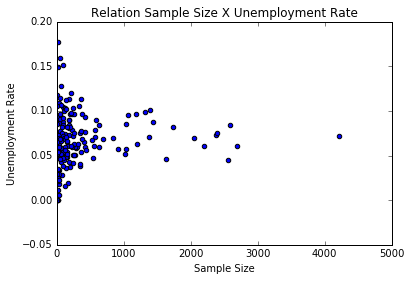

In [23]:
# sample size and unemployment rate:

ax2 = recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')
ax2.set_xlim(0, 5000)
ax2.set_title('Relation Sample Size X Unemployment Rate')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Unemployment Rate')
ax2.plot()

We find no direct relation between the popularity of the major and the unemployment rate.

[]

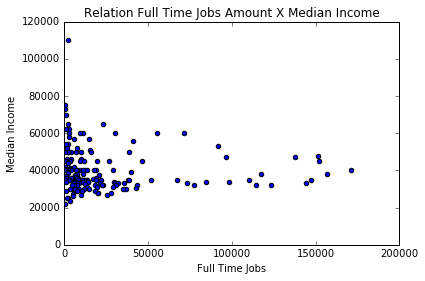

In [35]:
# amount of full time jobs and median income:

ax3 = recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter')
ax3.set_xlim(0, 200000)
ax3.set_title('Relation Full Time Jobs Amount X Median Income')
ax3.set_xlabel('Full Time Jobs')
ax3.set_ylabel('Median Income')
ax3.plot()

We find no direct relation between the amount of people in full time jobs for each major and the money people make.

[]

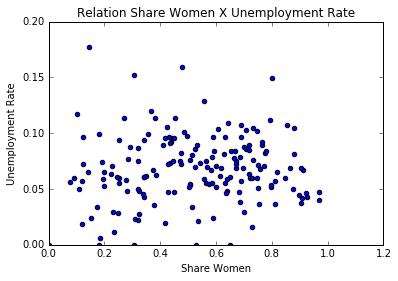

In [27]:
# share of women of the major and unemployment rate:

ax4 = recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter')
ax4.set_xlim(0, 1.2)
ax4.set_ylim(0, 0.2)
ax4.set_title('Relation Share Women X Unemployment Rate')
ax4.set_xlabel('Share Women')
ax4.set_ylabel('Unemployment Rate')
ax4.plot()

We also did not find no direct relation between the women rate in each major and the unemplyment rate.

[]

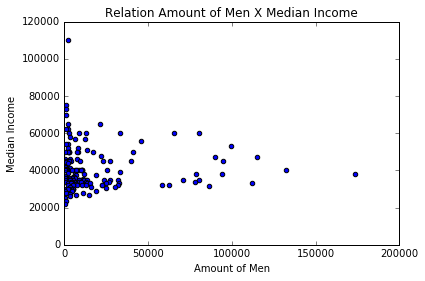

In [29]:
# amount of men in the sample and median income:

ax5 = recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter')
ax5.set_xlim(0, 200000)
ax5.set_title('Relation Amount of Men X Median Income')
ax5.set_xlabel('Amount of Men')
ax5.set_ylabel('Median Income')
ax5.plot()

[]

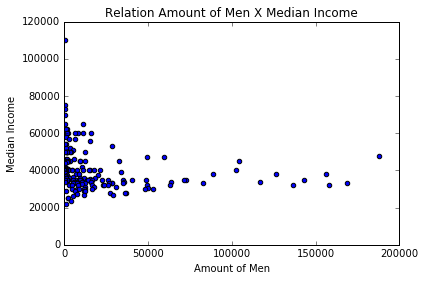

In [30]:
# amount of men in the sample and median income:

ax6 = recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter')
ax6.set_xlim(0, 200000)
ax6.set_title('Relation Amount of Men X Median Income')
ax6.set_xlabel('Amount of Men')
ax6.set_ylabel('Median Income')
ax6.plot()

It was possible to check that there is not relevant difference between the median salary between the majors with the majority of males and the majors with the majority of females.

## 3. Exploring distributions with histograms

We will now generate distrubtions for some columns of the dataframe.

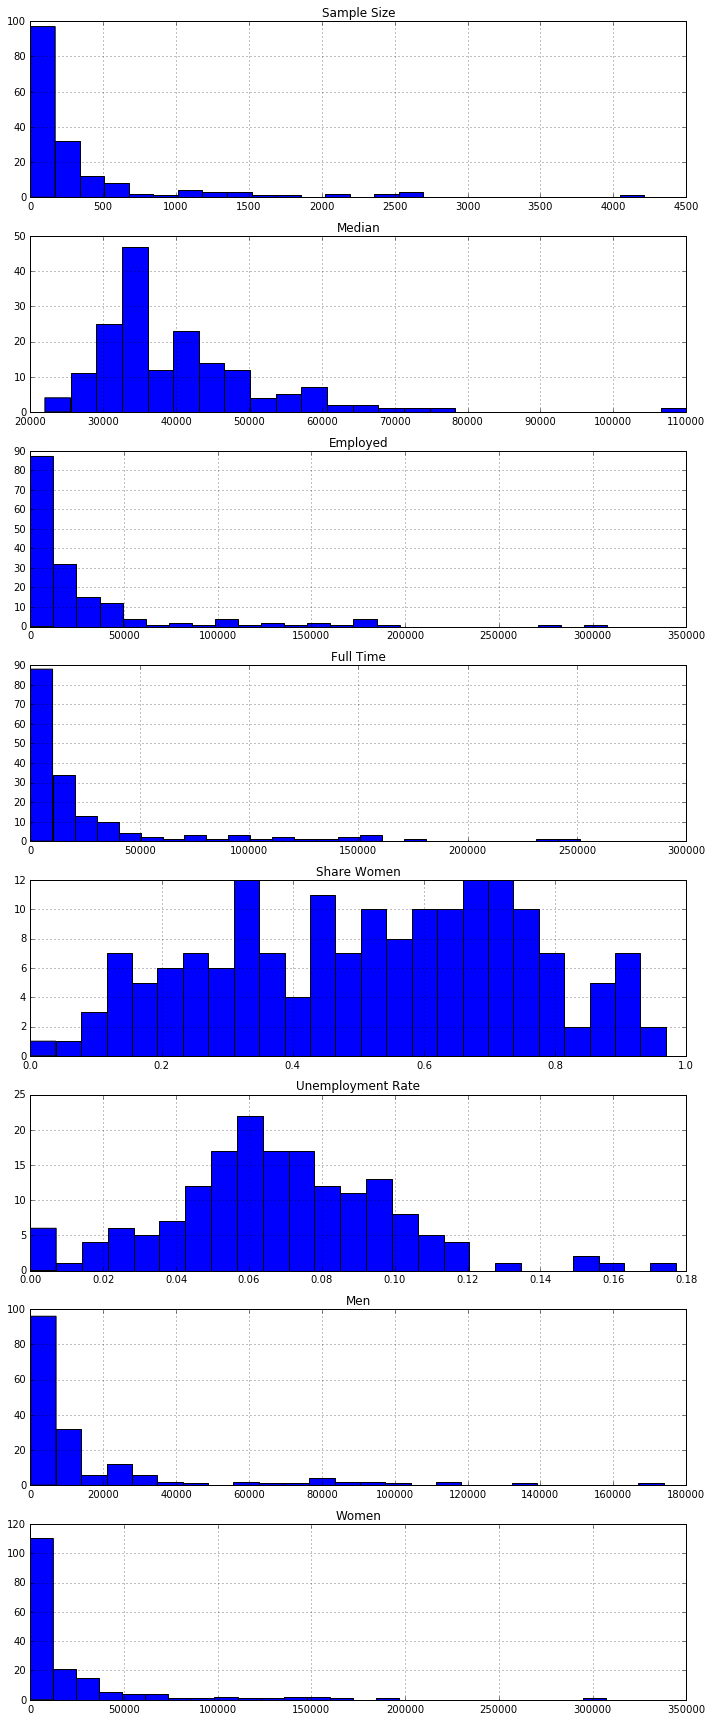

In [81]:
# creating a loop to generate multiple histograms:

# defining the columns to be ploted
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

# defining the names for each plot
hist_names = ["Sample Size", "Median", "Employed", "Full Time", "Share Women", "Unemployment Rate", "Men", "Women"]

fig = plt.figure(figsize=(10,24)) # defining the size of the plots

for i in range (0,8): # creating a range for the iteration
    ax = fig.add_subplot(8,1,i+1) # defining the position of the plot for each iteration
    ax = recent_grads[cols[i]].hist(bins=25) # defining the columns to be used in each iteration
    ax.set_title('{0}'.format(hist_names[i])) # defininf the title of the plot
        
fig.tight_layout()

Some conclusions:

- The vast majority fo sample sizes for each major is less than 500 people;
- The majority of majors have a median income between 30k and 50k USD;
- The unployment rate lies between 4% and 8% for the most part of majors;
- The are no relevant differences between the distribution of men and women between the majors.


## 4. Exploring relations and distriburions with scatter matrix plots

In [93]:
# importing the scatter_matrix function

from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7df2a05240>,
      dtype=object)

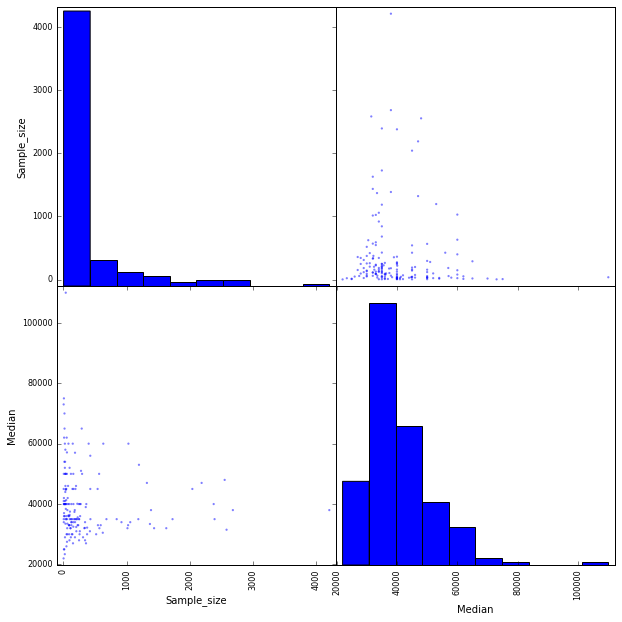

In [98]:
# exploring the relation between the sample size and the median with the scatter matrix

scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7df0bd9470>,
      dtype=object)

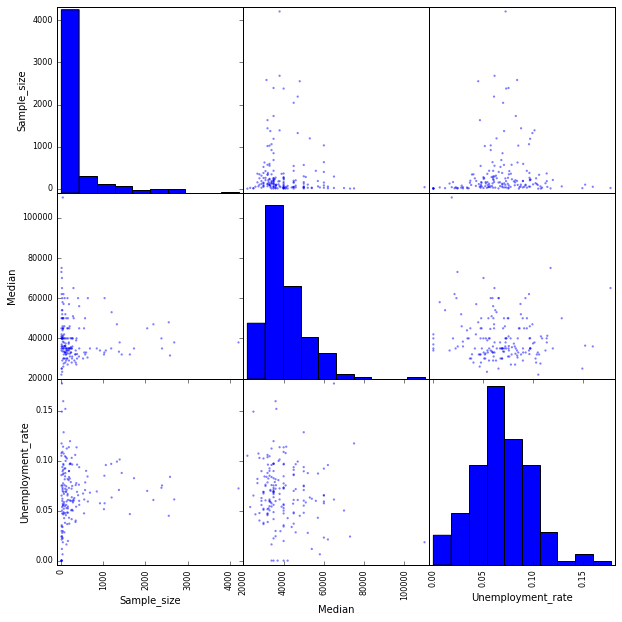

In [99]:
# exploring the relation between the sample size, the median and the unployment rate

scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7df008f2b0>,
      dtype=object)

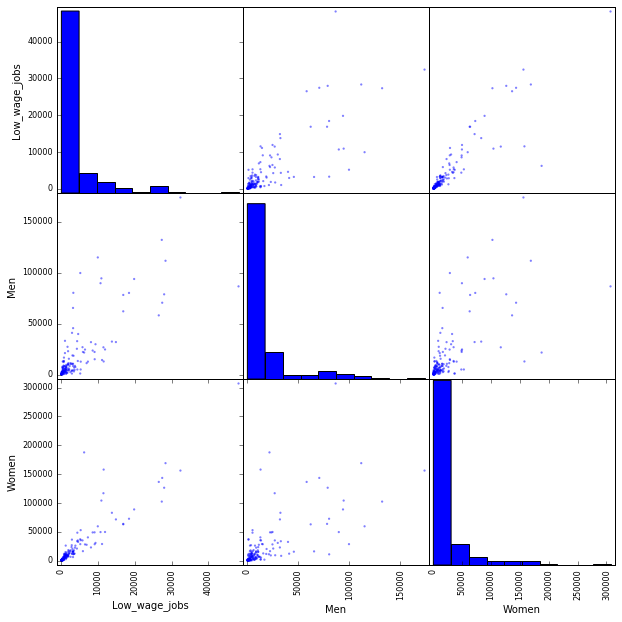

In [103]:
# exploring the relation and distribution of low age jobs and the amount
# of men and woman for each major

scatter_matrix(recent_grads[['Low_wage_jobs','Men', 'Women']], figsize=(10,10))

There is no relevant relation between the amount of men or women and the amount of low income jobs.

## 5. Exploring the majors and the major categories

Let's find out what are the majors with the biggest and the lowest women share and plot it in a bar plot.

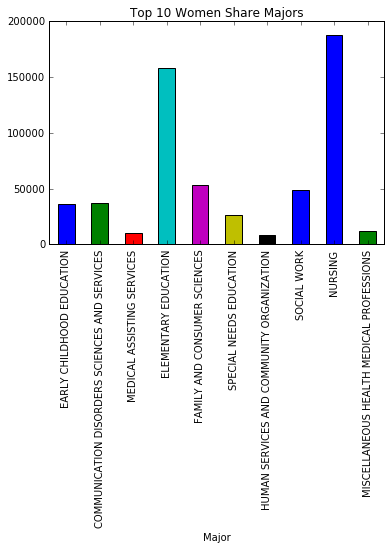

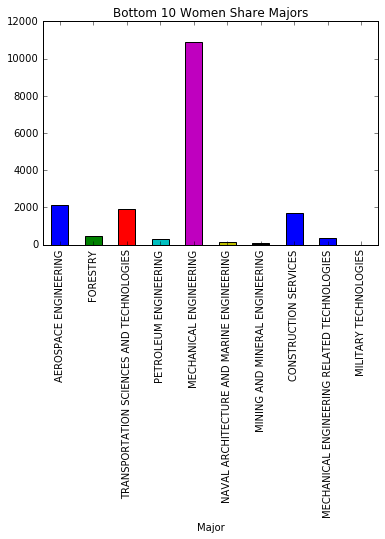

In [122]:
# generating bar plots to find out the majors with the biggest share of women graduated

recent_grads_women = recent_grads.sort_values('ShareWomen', ascending=False)
recent_grads_women.head(10).plot.bar(x='Major',y='Women', legend=False, title = "Top 10 Women Share Majors")

recent_grads_women = recent_grads.sort_values('ShareWomen', ascending=False)
recent_grads_women.tail(10).plot.bar(x='Major',y='Women', legend=False, title = "Bottom 10 Women Share Majors")

Not surprisingly, the majors with the biggest women share are in the areas of nursing, education and social services. In the other side, is stills possible to see that the lowest women share, as expected, are encountered in most technical fields such as engineerings and technology specific fields.

We can make this same analysis for the income and the unemployment rate.

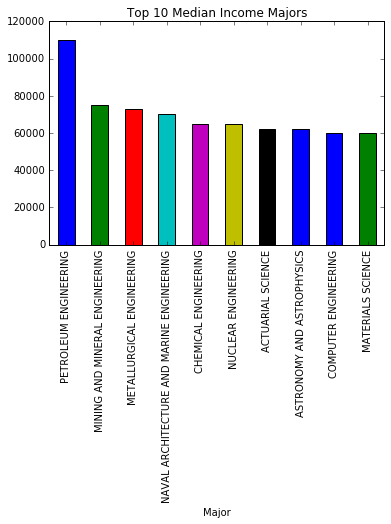

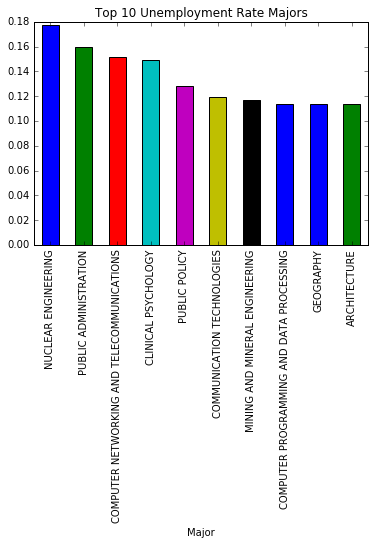

In [129]:
# generating bar plots to find out the majors with the highest unployment rate and median income

recent_grads_median = recent_grads.sort_values('Median', ascending=False)
recent_grads_median.head(10).plot.bar(x='Major',y='Median', legend=False, title = "Top 10 Median Income Majors")

recent_grads_unrate = recent_grads.sort_values('Unemployment_rate', ascending=False)
recent_grads_unrate.head(10).plot.bar(x='Major',y='Unemployment_rate', legend=False, title = "Top 10 Unemployment Rate Majors")

The engineering majors dominates the majority of the highest incomes. An interesting discovery is that both Nuclear Engineering and Mining and Mineral Engineering appears between the top 10 median incomes and in the top 10 unployment rates. 

What about the lowest unployment rate?

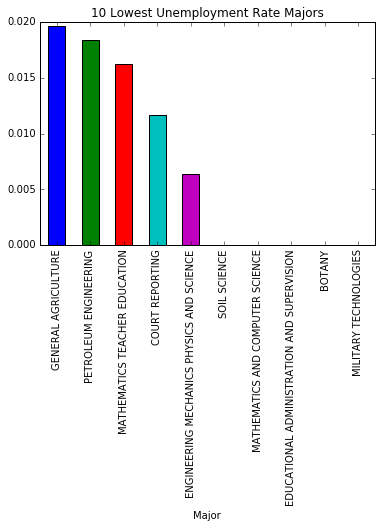

In [132]:
recent_grads_unrate.tail(10).plot.bar(x='Major',y='Unemployment_rate', legend=False, title = "10 Lowest Unemployment Rate Majors")

Petroleum Engineering seems to be a good option. It occurs not only as the biggest median income, but also as the second lowest unployment rate! There are also 5 majors with no unployment people in the survey: Soil Science, Mathematics and Computer Science, Educational Administration and Supervision, Bonaty and Military Technologies.

As a final step, we will generate boxplot to find out the differences in the median incomes and unployment rate form majors with biggest and lowest share of women:

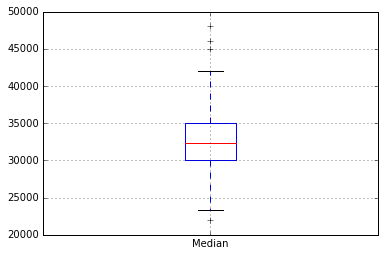

In [153]:
# visualizing a boxplot of the median income of majors with women share > 75%:

recent_grads[(recent_grads['ShareWomen']>0.75)].boxplot(column=['Median'])

For the majors with the women share bigger than 70%, the median income is around 33 KUSD. The 3rd percentile is around 42 KUSD.

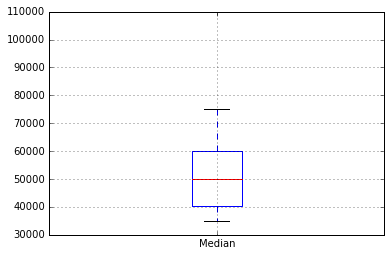

In [151]:
# visualizing a boxplot of the median income of majors with women share < 25%:

recent_grads[(recent_grads['ShareWomen']<0.25)].boxplot(column=['Median'])

For the majors with the women share lower than 25%, the median income is around 50 KUSD. The 3rd percentile is around 60 KUSD. People make way more money in the majors dominated by men.

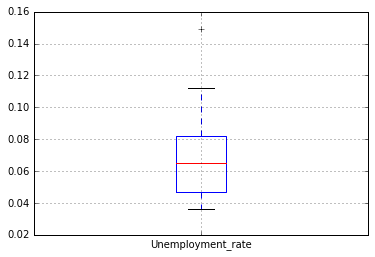

In [157]:
# visualizing a boxplot of the unployment rate of majors with women share > 75%:

recent_grads[(recent_grads['ShareWomen']>0.75)].boxplot(column=['Unemployment_rate'])

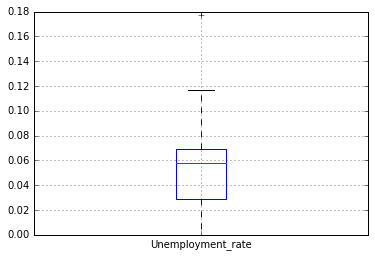

In [159]:
# visualizing a boxplot of the unployment rate of majors with women share < 25%:

recent_grads[(recent_grads['ShareWomen']<0.25)].boxplot(column=['Unemployment_rate'])

There are no relevant differences between the unployment rates between the majors with biggest an lower share of women. In the both cases, the median of unemployment is close to 6%. Looking at the third percentile, it is possible to see a slightly bigger difference, around 8,1% for women and 7% for men.